In [1]:
import cv2, sys
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Image Load

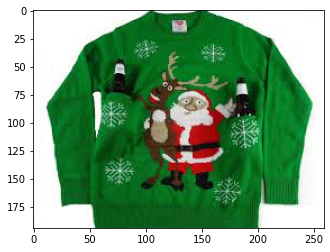

In [4]:
img = Image.open('../sampleImage/christmas.jpg')
img = img.convert("RGBA")
plt.imshow(img)

# Image backround default

In [5]:
img = img.resize((128, 128))
datas = img.getdata()

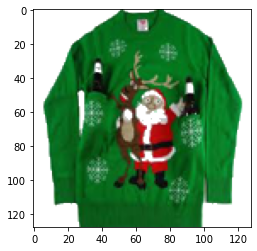

In [6]:
newData = []
cutOff = 200
 
for item in datas:
    if item[0] >= cutOff and item[1] >= cutOff and item[2] >= cutOff:
        newData.append((255, 255, 255, 0))
        # RGB의 각 요소가 모두 cutOff 이상이면 white
    else:
        newData.append(item)
        # 나머지 요소는 변경하지 않습니다.
 
img.putdata(newData)
plt.imshow(img)

In [7]:
img_pixel = pd.DataFrame(np.array(newData))
img_pixel

,0,1,2,3
0,255,255,255,0
1,255,255,255,0
2,255,255,255,0
3,255,255,255,0
4,255,255,255,0
...,...,...,...,...
16379,255,255,255,0
16380,255,255,255,0
16381,255,255,255,0
16382,255,255,255,0


In [8]:
# 투명과 불투명 두 개의 조건 있음
img_pixel[3].unique()

array([  0, 255])

In [9]:
# 투명한 pixel = 배경이므로 drop함.
drop_idx = img_pixel[img_pixel[3] == 0].index
drop_idx

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16374, 16375, 16376, 16377, 16378, 16379, 16380, 16381, 16382,
            16383],
           dtype='int64', length=4490)

In [10]:
img_pixel = img_pixel.drop(drop_idx)
img_pixel

,0,1,2,3
51,106,167,122,255
52,48,111,60,255
53,188,226,193,255
71,172,207,164,255
72,81,134,77,255
...,...,...,...,...
16351,13,98,40,255
16352,25,93,32,255
16353,9,108,32,255
16354,23,121,56,255


In [11]:
# 분석시에 투명도는 사용하지 안으므로 drop함
pixels = img_pixel.drop(columns=[3], axis=1)
pixels

,0,1,2
51,106,167,122
52,48,111,60
53,188,226,193
71,172,207,164
72,81,134,77
...,...,...,...
16351,13,98,40
16352,25,93,32
16353,9,108,32
16354,23,121,56


In [12]:
pixels.columns = ['R', 'G', 'B']
pixels

,R,G,B
51,106,167,122
52,48,111,60
53,188,226,193
71,172,207,164
72,81,134,77
...,...,...,...
16351,13,98,40
16352,25,93,32
16353,9,108,32
16354,23,121,56


In [13]:
pixels = pixels.reset_index(drop=True)
pixels

,R,G,B
0,106,167,122
1,48,111,60
2,188,226,193
3,172,207,164
4,81,134,77
...,...,...,...
11889,13,98,40
11890,25,93,32
11891,9,108,32
11892,23,121,56


# Clustering - KNN

In [14]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing
from sklearn.neighbors import KNeighborsClassifier

from itertools import compress

In [16]:
rgb_data = pd.read_csv('../colorChart/augmented_color_chart_11.csv')
rgb_data

,R,G,B,index
0,57,201,207,0
1,34,181,212,0
2,7,234,183,0
3,38,180,252,0
4,12,228,188,0
...,...,...,...,...
11006,128,0,0,6
11007,0,0,128,7
11008,255,0,0,8
11009,255,255,255,9


In [17]:
X = rgb_data[['R', 'G', 'B']]
y = rgb_data['index']
X

,R,G,B
0,57,201,207
1,34,181,212
2,7,234,183
3,38,180,252
4,12,228,188
...,...,...,...
11006,128,0,0
11007,0,0,128
11008,255,0,0
11009,255,255,255


In [18]:
y

0         0
1         0
2         0
3         0
4         0
         ..
11006     6
11007     7
11008     8
11009     9
11010    10
Name: index, Length: 11011, dtype: int64

In [19]:
# training and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,train_size = 0.7,test_size = 0.3,random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7707, 3) (3304, 3) (7707,) (3304,)


In [20]:
train_score = []
test_score = []

In [21]:
%%time

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

CPU times: total: 2.56 s
Wall time: 2.56 s


In [22]:
best_k = test_score.index(max(test_score))
best_k

8

In [23]:
%%time

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 7 ms


KNeighborsClassifier(n_neighbors=8)

In [24]:
knn.score(X_train, y_train)

0.9881925522252498

In [25]:
knn.score(X_test, y_test)

0.9872881355932204

In [26]:
n_test = len(y_test)
y_predict = knn.predict(X_test)

print('test data length:', n_test)
print('Number of data that matched the prediction:', sum(y_test == y_predict))
print('match rate:',round(sum(y_test == y_predict)/n_test*100,2),'%')

test data length: 3304
Number of data that matched the prediction: 3262
match rate: 98.73 %


# Test image's color pixel if learned model runs properly

In [27]:
from collections import Counter

In [28]:
%%time

pred_color = knn.predict(pixels)
pred_color

CPU times: total: 297 ms
Wall time: 282 ms


array([4, 4, 9, ..., 4, 4, 9], dtype=int64)

In [29]:
color_counts = Counter(knn.predict(pixels))
color_counts

Counter({4: 8387,
         9: 478,
         1: 2233,
         0: 60,
         6: 383,
         3: 5,
         5: 63,
         10: 97,
         8: 183,
         7: 5})

In [30]:
detected = [i for i in color_counts.keys()]
detected

[4, 9, 1, 0, 6, 3, 5, 10, 8, 7]

In [31]:
# colors = ['aqua','black', 'blue', 'fuchsia', 'gray', 'green', 'lime', 'maroon', 'navy', 'olive', 'purple', 'red', 'silver', 'teal', 'white', 'yellow']
colors = ['aqua','black', 'blue', 'fuchsia', 'green', 'lime', 'maroon', 'navy', 'red', 'white', 'yellow']

In [32]:
det_col = []
for i in range(len(detected)):
    det_col.append(colors[detected[i]])
    
det_col

['green',
 'white',
 'black',
 'aqua',
 'maroon',
 'fuchsia',
 'lime',
 'yellow',
 'red',
 'navy']

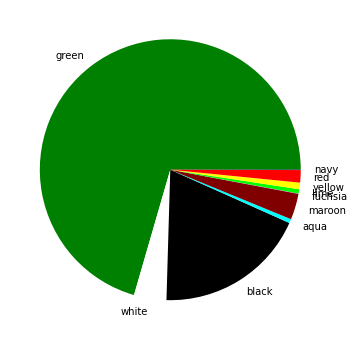

In [33]:
if (True):
    plt.figure(figsize = (8, 6))
    plt.pie(color_counts.values(), labels = det_col, colors=det_col)
    plt.savefig('christmas_KNN_pie_11.png')
    plt.show()

In [34]:
predicted = pd.DataFrame(pred_color)
predicted.columns = ['index']
predicted

,index
0,4
1,4
2,9
3,9
4,4
...,...
11889,4
11890,4
11891,4
11892,4


In [35]:
predicted = pixels.join(predicted)
predicted 

,R,G,B,index
0,106,167,122,4
1,48,111,60,4
2,188,226,193,9
3,172,207,164,9
4,81,134,77,4
...,...,...,...,...
11889,13,98,40,4
11890,25,93,32,4
11891,9,108,32,4
11892,23,121,56,4


In [36]:
predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   R       11894 non-null  int32
 1   G       11894 non-null  int32
 2   B       11894 non-null  int32
 3   index   11894 non-null  int64
dtypes: int32(3), int64(1)
memory usage: 232.4 KB


In [37]:
pred_col = predicted['index'].to_list()

In [38]:
cols_for_scatter = []

for i in range(len(pred_col)):
    cols_for_scatter.append(colors[pred_col[i]])
    
len(cols_for_scatter)

11894

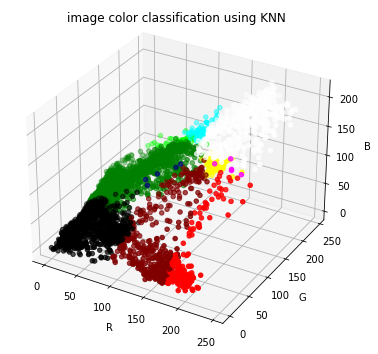

In [39]:
# 이미지 픽셀값 분포 scatter
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1, projection='3d')

ax.scatter(predicted['R'], predicted['G'], predicted['B'], c = cols_for_scatter);
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_title('image color classification using KNN', y=1.02)

plt.tight_layout()
plt.savefig(f'KNN_color_classify_chirstmas_11.png')
plt.show()

In [40]:
max(color_counts.values())

8387

In [41]:
for k, v in color_counts.items():
    if v == max(color_counts.values()):
        max_idx = k
        
max_idx

4

# Finding the most significant color

In [42]:
html = pd.read_csv('../colorChart/colorChart_11.csv')
html

,index,name,R,G,B
0,0,aqua,0,255,255
1,1,black,0,0,0
2,2,blue,0,0,255
3,3,fuchsia,255,0,255
4,4,green,0,128,0
5,5,lime,0,255,0
6,6,maroon,128,0,0
7,7,navy,0,0,128
8,8,red,255,0,0
9,9,white,255,255,255


In [43]:
max_idx

4

In [44]:
html[html['index'] == max_idx]['name']

4    green
Name: name, dtype: object